In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import yfinance as yf
from scipy.stats import norm

In [ ]:
years = 10
end_date = dt.datetime.now()
start_date = end_date - dt.timedelta(days=365*years)

**List of Tickers:**

In [ ]:
tickers = ['MSCI','VTI', 'VWO', 'SPY']

In [ ]:
adj_close = pd.DataFrame()

for ticker in tickers:
    data = yf.download(ticker, start = start_date, end = end_date)
    adj_close[ticker] = data['Close']

print(adj_close.head())

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

                 MSCI        VTI        VWO         SPY
Date                                                   
2015-03-27  53.428509  90.388908  29.882795  173.104156
2015-03-30  54.630157  91.539154  30.494186  175.216034
2015-03-31  54.979900  90.710297  30.471804  173.684708
2015-04-01  54.737782  90.541145  30.881866  173.070496
2015-04-02  55.159233  90.828712  31.359045  173.693192


**Calculation of Daily Log Returns:**

In [ ]:
log_returns = np.log(adj_close / adj_close.shift(1))
log_returns = log_returns.dropna()
print(log_returns.head())

                MSCI       VTI       VWO       SPY
Date                                              
2015-03-30  0.022242  0.012645  0.020253  0.012126
2015-03-31  0.006382 -0.009096 -0.000734 -0.008778
2015-04-01 -0.004413 -0.001866  0.013367 -0.003543
2015-04-02  0.007670  0.003171  0.015334  0.003591
2015-04-06  0.009868  0.006867  0.012052  0.006710


**Creating an Equally weighted Portfolio:**

(This can be changed according to what weight we will be deciding)

In [ ]:
portfolio_value = 35000
weights = np.array([1/len(tickers)]*len(tickers))
print(weights)

[0.25 0.25 0.25 0.25]


**Historical Returns Calculation:**

In [ ]:
historical_returns = (log_returns*weights).sum(axis=1)
print(historical_returns.head())

Date
2015-03-30    0.016817
2015-03-31   -0.003057
2015-04-01    0.000886
2015-04-02    0.007442
2015-04-06    0.008875
dtype: float64


**'X'-Days Historical Returns:**

In [ ]:
days = 5

range_returns = historical_returns.rolling(window = days).sum()
range_returns = range_returns.dropna()
print(range_returns.head(10))

Date
2015-04-06    0.030962
2015-04-07    0.008658
2015-04-08    0.020868
2015-04-09    0.020766
2015-04-10    0.014725
2015-04-13    0.001715
2015-04-14    0.011824
2015-04-15    0.006244
2015-04-16    0.008353
2015-04-17   -0.005304
dtype: float64


# **Value at Risk (VaR) Calcualtion using historical method:**

In [ ]:
confidence_interval = 0.95

VaR = -np.percentile(range_returns, 100 - (confidence_interval*100))*portfolio_value
print(VaR)

1355.7186908977192


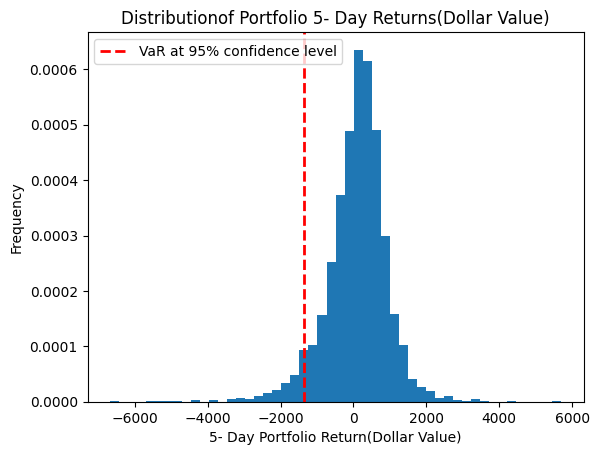

In [ ]:
return_window = days
range_returns = historical_returns.rolling(window=return_window).sum()
range_returns = range_returns.dropna()

range_returns_dollars = range_returns*portfolio_value

plt.hist(range_returns_dollars.dropna(), bins=50, density = True)
plt.xlabel(f'{return_window}- Day Portfolio Return(Dollar Value)')
plt.ylabel('Frequency')
plt.title(f'Distributionof Portfolio {return_window}- Day Returns(Dollar Value)')
plt.axvline(-VaR, color='r', linestyle='--', linewidth = 2, label=f'VaR at {confidence_interval:.0%} confidence level')
plt.legend()
plt.show()